# INEURON HACKATHON
## PROBLEM STATEMENT - 2

**********************************

SUBMITTED BY: 
    SHUBHAM TANAJI KAKDE

**********************************

In [3]:
# import libraries
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})


In [4]:
file1 = open("dictionary.txt","r",encoding="ISO-8859-1")
dict_list=file1.readlines()

In [5]:
dict_list

['DATA DICTIONARY\n',
 '\n',
 'Nr Name Description Domain\n',
 '1 MOSTYPE Customer Subtype see L0\n',
 '2 MAANTHUI Number of houses 1 \x96 10\n',
 '3 MGEMOMV Avg size household 1 \x96 6\n',
 '4 MGEMLEEF Avg age see L1\n',
 '5 MOSHOOFD Customer main type see L2\n',
 '6 MGODRK Roman catholic see L3\n',
 '7 MGODPR Protestant ...\n',
 '8 MGODOV Other religion\n',
 '9 MGODGE No religion\n',
 '10 MRELGE Married\n',
 '11 MRELSA Living together\n',
 '12 MRELOV Other relation\n',
 '13 MFALLEEN Singles\n',
 '14 MFGEKIND Household without children\n',
 '15 MFWEKIND Household with children\n',
 '16 MOPLHOOG High level education\n',
 '17 MOPLMIDD Medium level education\n',
 '18 MOPLLAAG Lower level education\n',
 '19 MBERHOOG High status\n',
 '20 MBERZELF Entrepreneur\n',
 '21 MBERBOER Farmer\n',
 '22 MBERMIDD Middle management\n',
 '23 MBERARBG Skilled labourers\n',
 '24 MBERARBO Unskilled labourers\n',
 '25 MSKA Social class A\n',
 '26 MSKB1 Social class B1\n',
 '27 MSKB2 Social class B2\n',
 '28

In [6]:
features=[]
for i in range(3,89):
    features.append(dict_list[i].split(' ')[1])

In [7]:
features

['MOSTYPE',
 'MAANTHUI',
 'MGEMOMV',
 'MGEMLEEF',
 'MOSHOOFD',
 'MGODRK',
 'MGODPR',
 'MGODOV',
 'MGODGE',
 'MRELGE',
 'MRELSA',
 'MRELOV',
 'MFALLEEN',
 'MFGEKIND',
 'MFWEKIND',
 'MOPLHOOG',
 'MOPLMIDD',
 'MOPLLAAG',
 'MBERHOOG',
 'MBERZELF',
 'MBERBOER',
 'MBERMIDD',
 'MBERARBG',
 'MBERARBO',
 'MSKA',
 'MSKB1',
 'MSKB2',
 'MSKC',
 'MSKD',
 'MHHUUR',
 'MHKOOP',
 'MAUT1',
 'MAUT2',
 'MAUT0',
 'MZFONDS',
 'MZPART',
 'MINKM30',
 'MINK3045',
 'MINK4575',
 'MINK7512',
 'MINK123M',
 'MINKGEM',
 'MKOOPKLA',
 'PWAPART',
 'PWABEDR',
 'PWALAND',
 'PPERSAUT',
 'PBESAUT',
 'PMOTSCO',
 'PVRAAUT',
 'PAANHANG',
 'PTRACTOR',
 'PWERKT',
 'PBROM',
 'PLEVEN',
 'PPERSONG',
 'PGEZONG',
 'PWAOREG',
 'PBRAND',
 'PZEILPL',
 'PPLEZIER',
 'PFIETS',
 'PINBOED',
 'PBYSTAND',
 'AWAPART',
 'AWABEDR',
 'AWALAND',
 'APERSAUT',
 'ABESAUT',
 'AMOTSCO',
 'AVRAAUT',
 'AAANHANG',
 'ATRACTOR',
 'AWERKT',
 'ABROM',
 'ALEVEN',
 'APERSONG',
 'AGEZONG',
 'AWAOREG',
 'ABRAND',
 'AZEILPL',
 'APLEZIER',
 'AFIETS',
 'AINBOED',
 '

In [9]:
df_train=pd.read_csv('ticdata2000.txt',sep='\t',names=features)
df_train

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_test=pd.read_csv('ticeval2000.txt',sep='\t',names=features[:-1])
df_test

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,33,1,2,4,8,0,7,2,0,5,...,0,0,0,0,1,0,0,0,0,0
3996,24,1,2,3,5,1,5,1,3,4,...,1,0,0,0,1,0,0,0,0,0
3997,36,1,2,3,8,1,5,1,3,7,...,0,0,0,0,1,0,0,0,1,0
3998,33,1,3,3,8,1,4,2,3,7,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_train

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_target=pd.read_csv('tictgts2000.txt',sep='\t',names=['target'])
df_target

,target
0,0
1,1
2,0
3,0
4,0
...,...
3995,0
3996,1
3997,0
3998,0


In [18]:
df_train['MGEMLEEF'].value_counts()

3    3000
2    1452
4    1073
5     193
1      74
6      30
Name: MGEMLEEF, dtype: int64

In [19]:
import matplotlib.pyplot as plt

In [20]:
plt.hist

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

<AxesSubplot:xlabel='MAANTHUI', ylabel='count'>

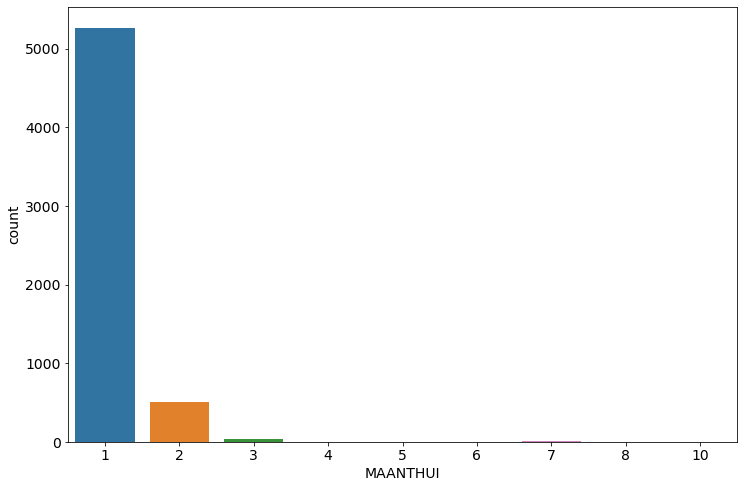

In [21]:
sns.countplot(df_train['MAANTHUI'])

<AxesSubplot:xlabel='MGEMLEEF', ylabel='count'>

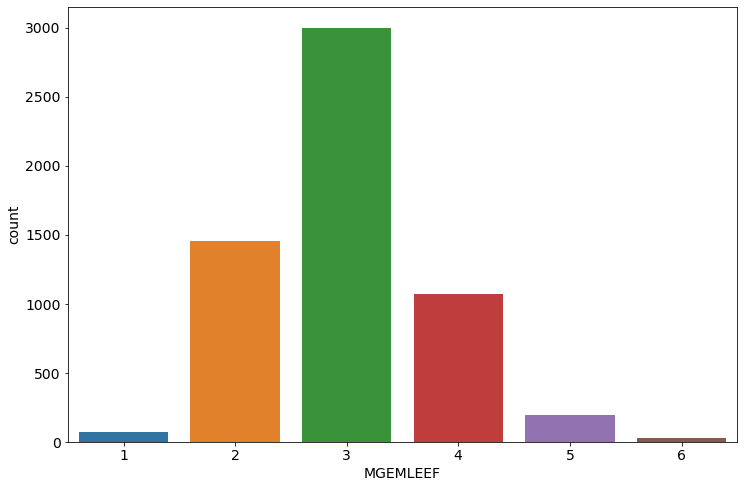

In [22]:
sns.countplot(df_train['MGEMLEEF'])


<AxesSubplot:xlabel='MOSHOOFD', ylabel='count'>

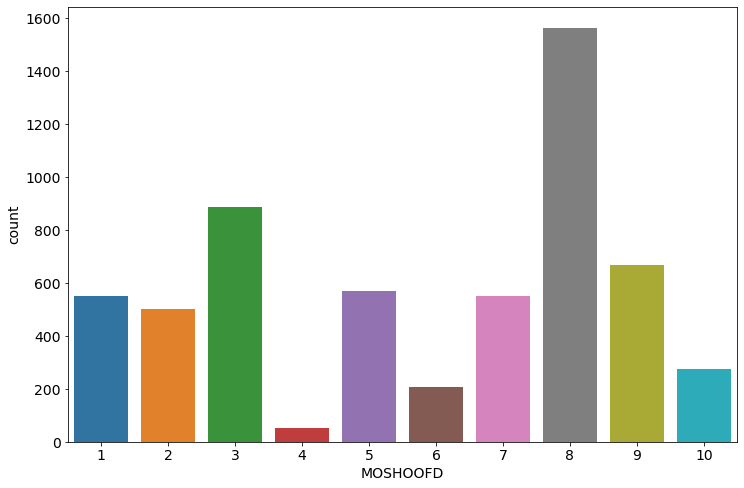

In [23]:
sns.countplot(df_train['MOSHOOFD'])


In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [25]:
X=df_train[features[:-1]]
y=df_train[features[-1]]

In [26]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

RandomForestRegressor()

Text(0.5, 0, 'Random Forest Feature Importance')

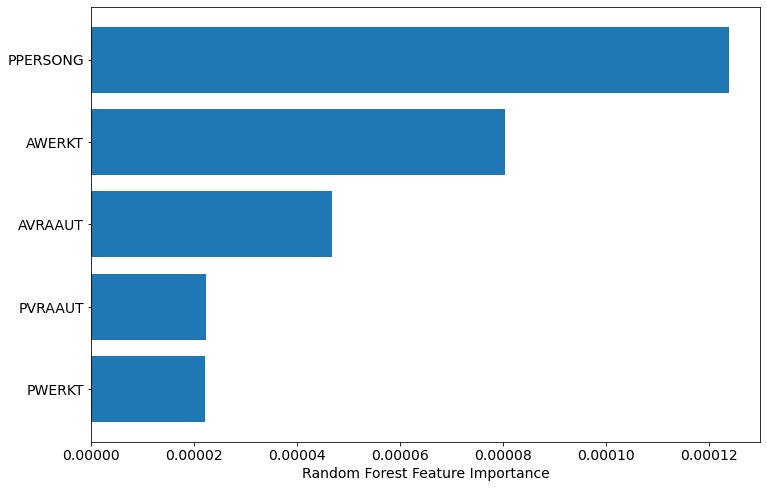

In [27]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx][:5], rf.feature_importances_[sorted_idx][:5])
plt.xlabel("Random Forest Feature Importance")

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, jaccard_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

lr = LogisticRegression(class_weight='balanced')

model_to_set = lr

parameters = {
'C' : np.linspace(0.1,3,num=10),
'penalty': ['l1','l2',None],
'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv = 3, 
                             scoring='f1_weighted', n_jobs = 4, verbose = 1)

gsLR=model_tunning.fit(X,y)

LR_best = gsLR.best_estimator_

print(model_tunning.best_score_)
print(model_tunning.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/Users/shubham.kakde1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shubham.kakde1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shubham.kakde1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shubham.kakde1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative sol

0.8416124297204718
{'C': 1.711111111111111, 'penalty': 'l1', 'solver': 'saga'}


In [29]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [30]:
df_target['target']

0       0
1       1
2       0
3       0
4       0
       ..
3995    0
3996    1
3997    0
3998    0
3999    0
Name: target, Length: 4000, dtype: int64

In [31]:
#lr.fit(X,y)
y_pred = LR_best.predict(df_test)

f1_score(y_pred, df_target[['target']],average='weighted')

0.6222358516800467

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, df_target[['target']]))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      2749
           1       0.61      0.12      0.20      1251

    accuracy                           0.70      4000
   macro avg       0.66      0.54      0.51      4000
weighted avg       0.68      0.70      0.62      4000



In [33]:
from sklearn.ensemble import RandomForestClassifier

model_to_set = RandomForestClassifier(class_weight='balanced')

parameters = {"max_depth": [1,2,3,4,6,10],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[10,50,100,300],
              "criterion": ["gini"]}



model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv = 3, 
                             scoring='f1_weighted', n_jobs = 4, verbose = 1)

gsRF=model_tunning.fit(X,y)

RF_best = gsRF.best_estimator_

print(model_tunning.best_score_)
print(model_tunning.best_params_)



Fitting 3 folds for each of 648 candidates, totalling 1944 fits
0.8855823469921128
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [34]:
#lr.fit(X,y)
y_pred = RF_best.predict(df_test)

f1_score(y_pred, df_target[['target']],average='weighted')


0.8031000696467013

In [35]:

from sklearn.metrics import classification_report

print(classification_report(y_pred, df_target[['target']]))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3390
           1       0.39      0.15      0.22       610

    accuracy                           0.83      4000
   macro avg       0.63      0.56      0.56      4000
weighted avg       0.79      0.83      0.80      4000

